In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1)LOAD THE DATASET

In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset_Bike (1).csv')

2)Check for null values in the data and drop records with NAs.

In [6]:
null_counts = data.isnull().sum()
print(null_counts)
# Drop records with NAs
data.dropna(inplace=True)
print(data)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
       instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1  01-01-11       1   0     1   0        0        6           0   
1            2  01-01-11       1   0     1   1        0        6           0   
2            3  01-01-11       1   0     1   2        0        6           0   
3            4  01-01-11       1   0     1   3        0        6           0   
4            5  01-01-11       1   0     1   4        0        6           0   
...        ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375  31-12-12       1   1    12  19        0        1           1   
17375    17376  31-12-12       1   1    12  20        0        1           

3)	Sanity checks:
1.	Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.
2.	Month values should be 1-12 only
3.	Hour values should be 0-23


In [17]:
#1
data['check_sum'] = data['registered'] + data['casual']
assert(data['check_sum'] == data['cnt']).all()
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check_sum
0,1,01-01-11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,16
1,2,01-01-11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,40
2,3,01-01-11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32
3,4,01-01-11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,13
4,5,01-01-11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,119
17375,17376,31-12-12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,89
17376,17377,31-12-12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,90
17377,17378,31-12-12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,61


In [14]:
#2
print("Unique values in 'mnth' column:", data['mnth'].unique())
data = data[data['mnth'].between(1, 12)]

Unique values in 'mnth' column: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [15]:
#3
print("Unique values in 'hr' column:", data['hr'].unique())
data = data[data['hr'].between(0, 23)]

Unique values in 'hr' column: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


4)	The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [16]:
inp1 = data.drop(['casual', 'registered', 'instant', 'dteday'], axis=1)
print(inp1)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  cnt  check_sum  
0 

5)Univariate analysis: 
•	Describe the numerical fields in the dataset using pandas describe method.
•	Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.
•	Boxplot for atemp 
o	Are there any outliers?
•	Histogram for hum
o	Do you detect any abnormally high values?
•	Density plot for windspeed
•	Box and density plot for cnt – this is the variable of interest 
o	Do you see any outliers in the boxplot? 
o	Does the density plot provide a similar insight?

In [20]:
# Describe the numerical fields in the dataset using pandas describe method
numerical_fields = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'cnt']
description = data[numerical_fields].describe()
print(description)

             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

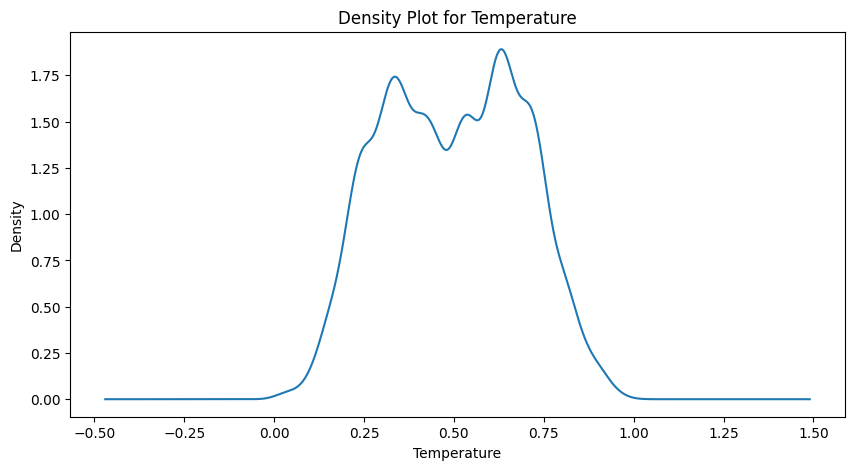

In [34]:
#Make density plot for temp
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Density Plot for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
inp1['temp'].plot(kind='density')
plt.show()

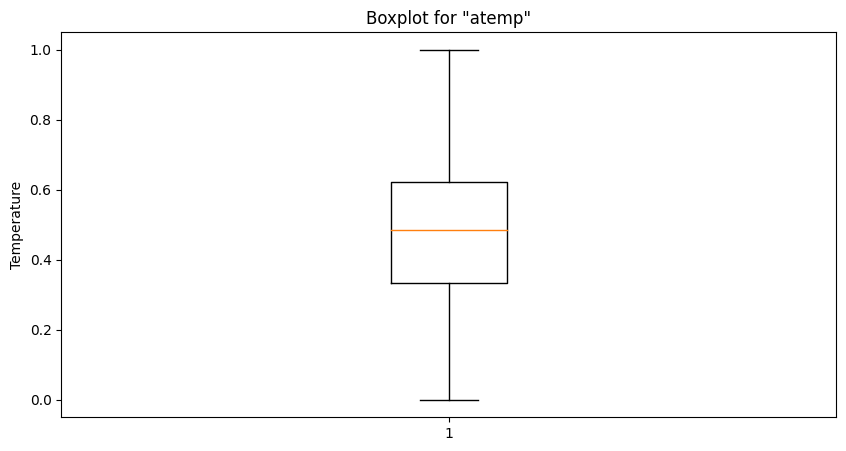

In [35]:
#Boxplot for atemp
plt.figure(figsize=(10, 5))
plt.title('Boxplot for "atemp"')
plt.ylabel('Temperature')
plt.boxplot(inp1['atemp'])
plt.show()

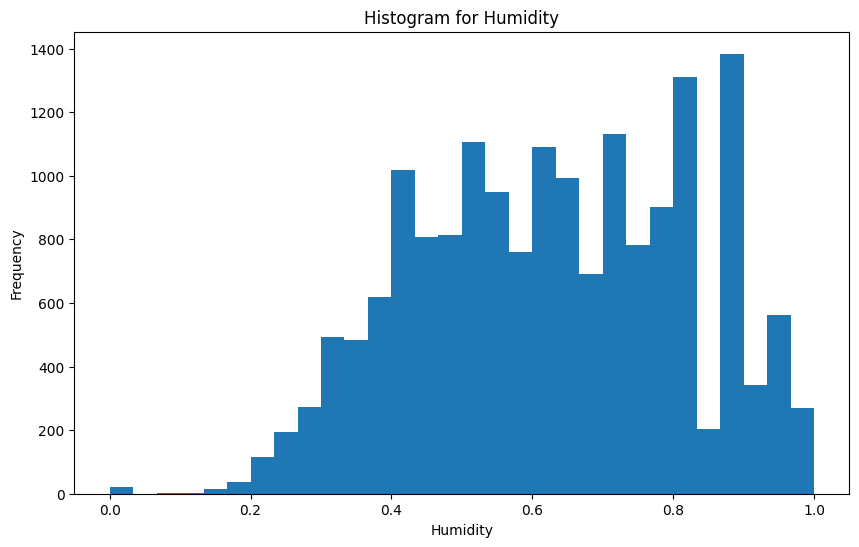

In [36]:
#Histogram for hum
plt.figure(figsize=(10,6))
plt.title('Histogram for Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.hist(inp1['hum'], bins=30)
plt.show()

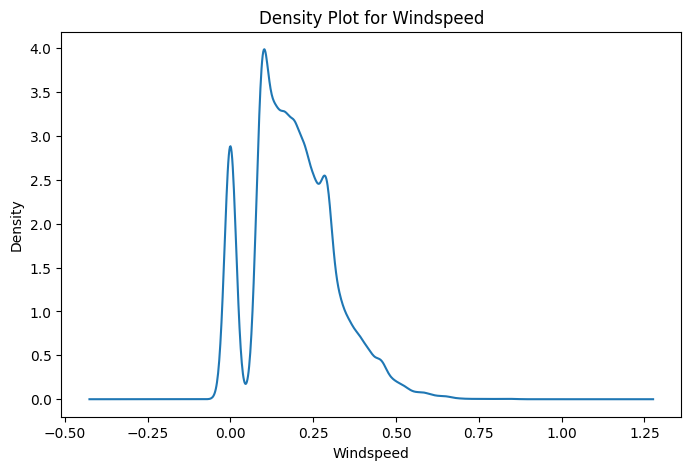

In [40]:
#Density plot for windspeed
plt.figure(figsize=(10, 5))
plt.title('Density Plot for Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Density')
inp1['windspeed'].plot(kind='density')
plt.show()

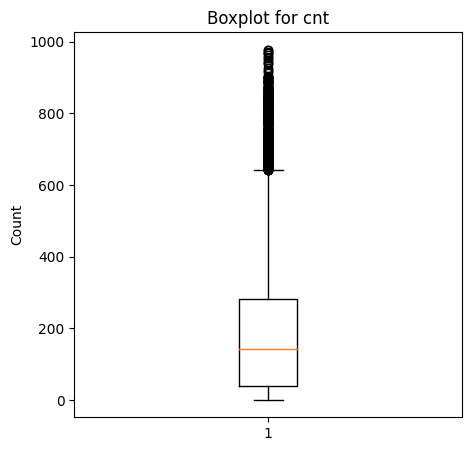

In [43]:
#Boxplot for cnt
plt.figure(figsize=(5, 5))
plt.title('Boxplot for cnt')
plt.ylabel('Count')
plt.boxplot(inp1['cnt'])
plt.show()

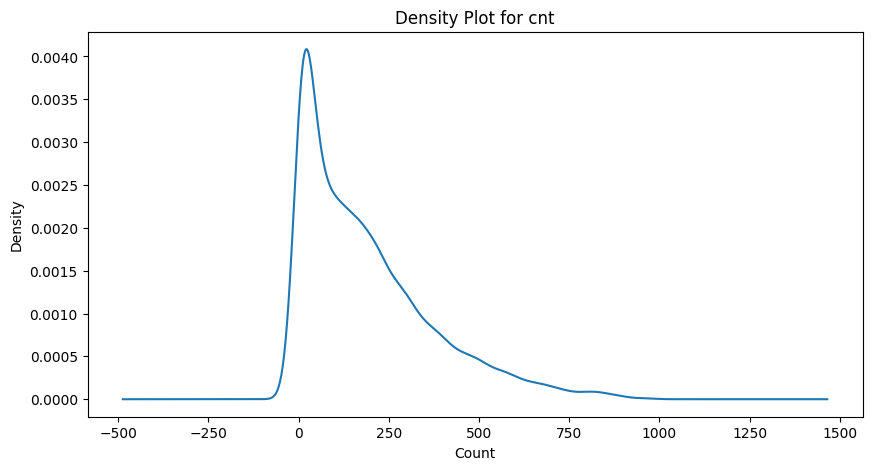

In [44]:
# Density plot for cnt
plt.figure(figsize=(10, 5))
plt.title('Density Plot for cnt')
plt.xlabel('Count')
plt.ylabel('Density')
inp1['cnt'].plot(kind='density')
plt.show()

In [46]:
#6) Outlier treatment:  
#1)Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99
#2)Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.
percentiles = inp1['cnt'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(percentiles)
cutoff = percentiles[0.95] #choose cutoff percentile as 0.95
inp2 = inp1[inp1['cnt'] <= cutoff]
inp2

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,check_sum
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,61


<Axes: title={'center': 'Boxplot of cnt by Hour'}, xlabel='hr', ylabel='cnt'>

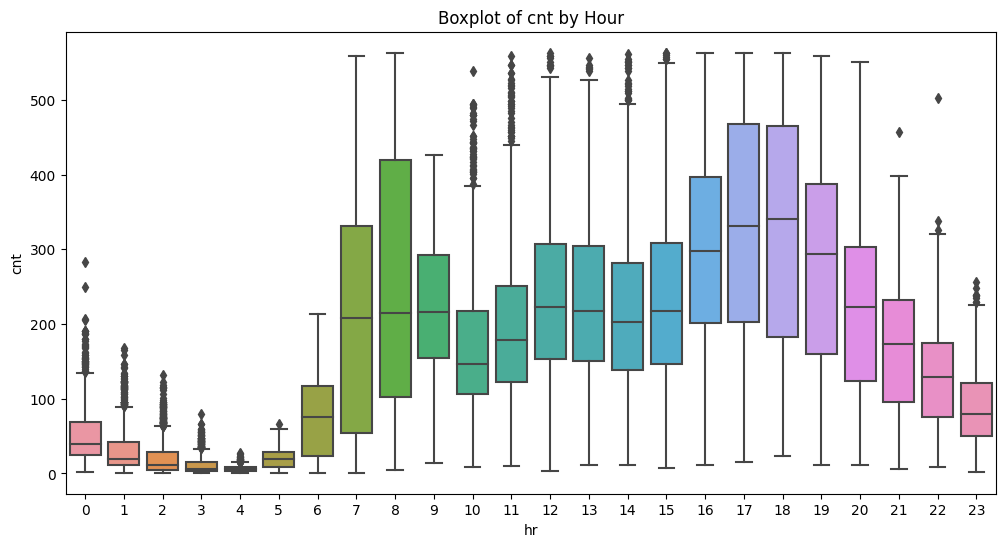

In [51]:
#7)Bivariate analysis
#1.Make boxplot for cnt vs. hour
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.title('Boxplot of cnt by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
sns.boxplot(data=inp2, x='hr', y='cnt')

([<matplotlib.axis.XTick at 0x7f879dcf4130>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

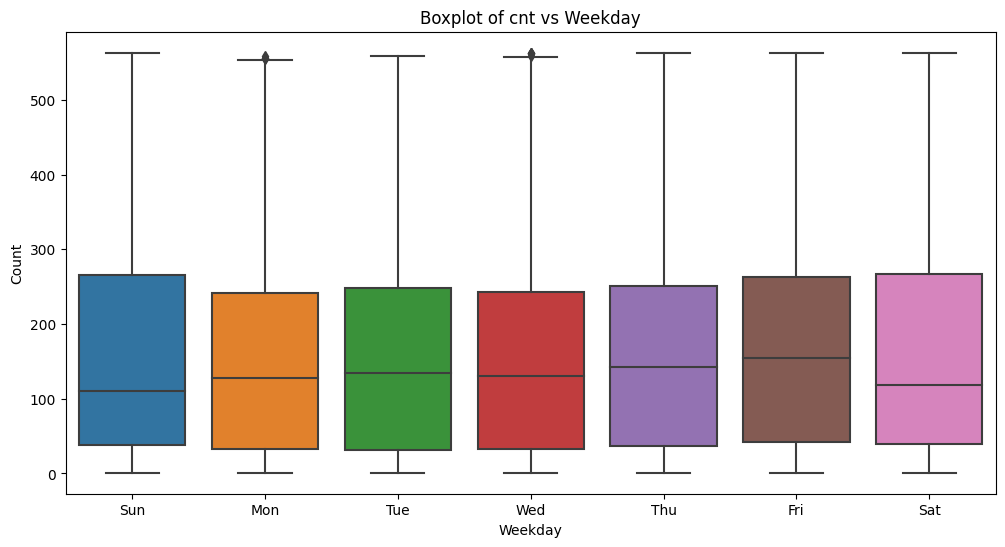

In [56]:
#2.	Make boxplot for cnt vs. weekday
plt.figure(figsize=(12, 6))
plt.title('Boxplot of cnt vs Weekday')
sns.boxplot(data=inp2, x='weekday', y='cnt')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(range(0,7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

<Axes: title={'center': 'Boxplot of cnt vs Month'}, xlabel='mnth', ylabel='cnt'>

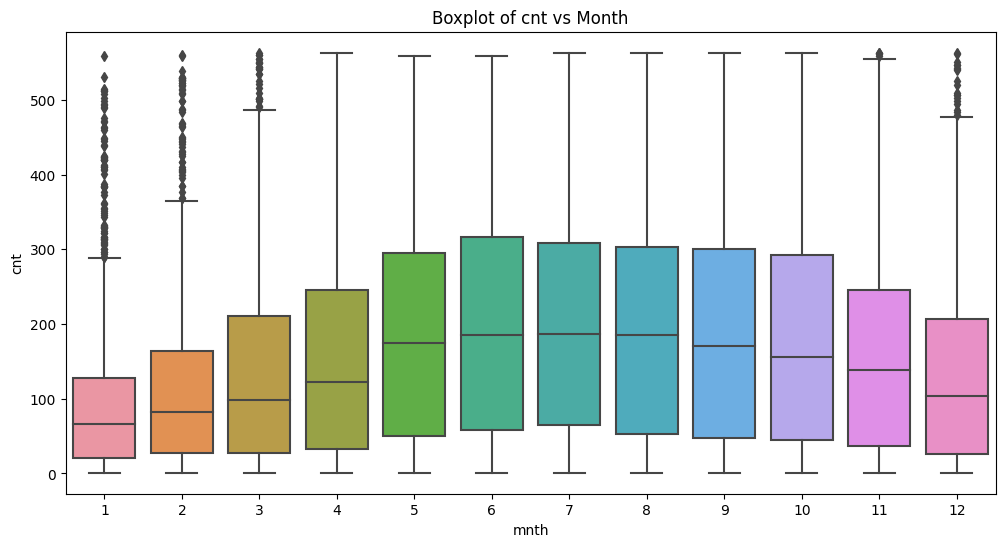

In [62]:
#Make boxplot for cnt vs. month
plt.figure(figsize=(12, 6))
plt.title('Boxplot of cnt vs Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #numerical values 1-12 represent months
sns.boxplot(data=inp2, x='mnth', y='cnt')

<Axes: title={'center': 'Boxplot of cnt by Season'}, xlabel='season', ylabel='cnt'>

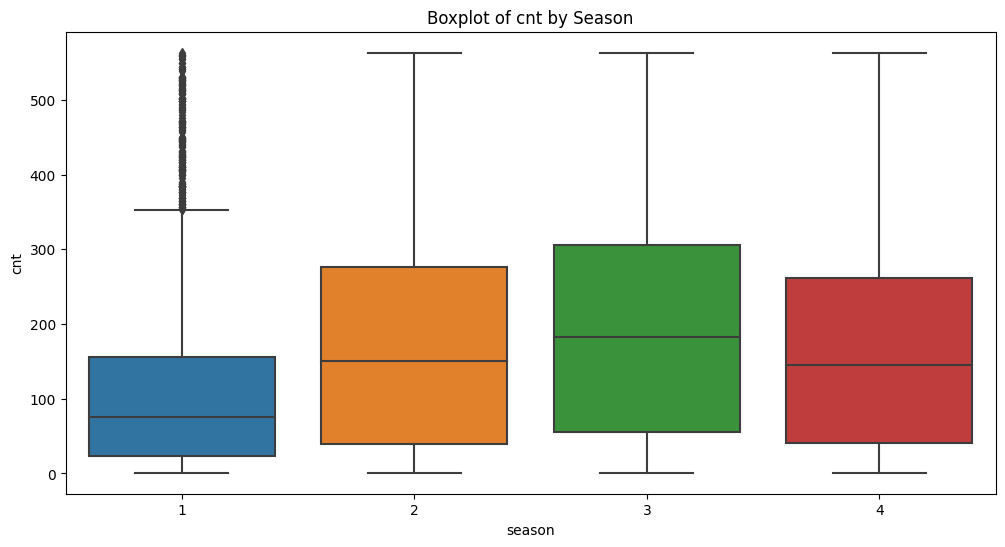

In [65]:
#	Make boxplot for cnt vs. season
plt.figure(figsize=(12, 6))
plt.title('Boxplot of cnt by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(range(0,4), labels=['Spring', 'Summer', 'Rainy', 'Winter']) #numerical values represent seasons
sns.boxplot(data=inp2, x='season', y='cnt')

<Axes: title={'center': 'Median cnt by Hour'}, xlabel='hr', ylabel='cnt'>

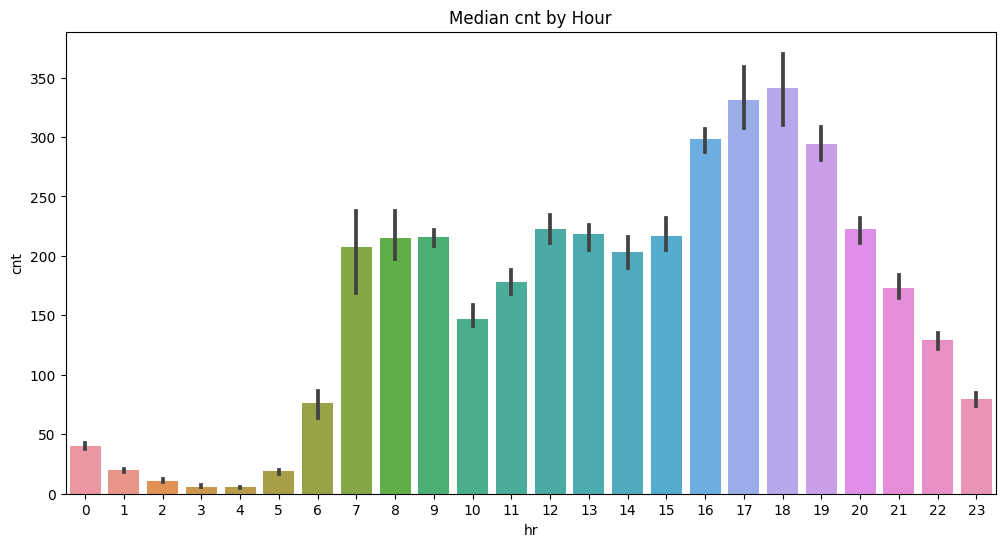

In [69]:
#Make a bar plot with the median value of cnt for each hr
import numpy as np
plt.figure(figsize=(12, 6))
plt.title('Median cnt by Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count')
sns.barplot(data=inp2, x='hr', y='cnt', estimator=np.median)

Text(0.5, 1.0, 'Correlation Matrix')

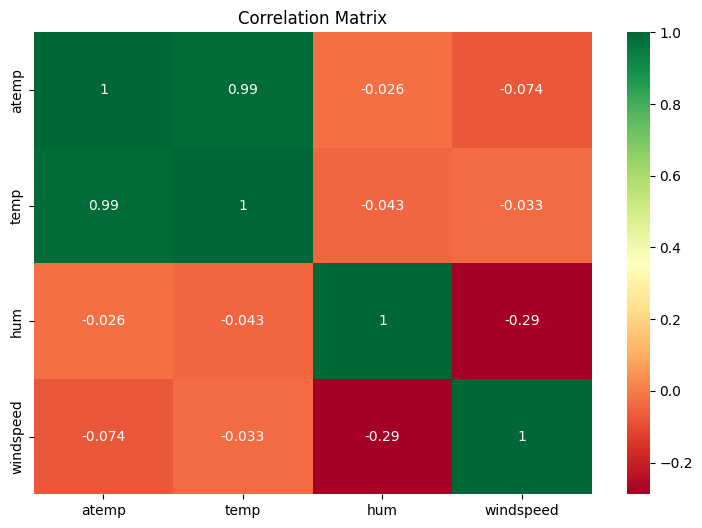

In [82]:
#Make a correlation matrix for variables atemp, temp, hum, and windspeed
correlation_matrix = inp2[['atemp', 'temp', 'hum', 'windspeed']].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')

In [84]:
#8) Data preprocessing
# Treating mnth column
inp2['mnth'] = inp2['mnth'].replace([5, 6, 7, 8, 9, 10], 5)
mnth_dummies = pd.get_dummies(inp2['mnth'], prefix='mnth')
inp2 = pd.concat([inp2, mnth_dummies], axis=1)
inp2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_5,mnth_11,mnth_12,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_11,mnth_12
0,1,0,1,0,0,6,0,1,0.24,0.2879,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,1,0,6,0,1,0.22,0.2727,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,2,0,6,0,1,0.22,0.2727,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,3,0,6,0,1,0.24,0.2879,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,4,0,6,0,1,0.24,0.2879,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,...,0,0,1,0,0,0,0,0,0,1
17375,1,1,12,20,0,1,1,2,0.26,0.2576,...,0,0,1,0,0,0,0,0,0,1
17376,1,1,12,21,0,1,1,1,0.26,0.2576,...,0,0,1,0,0,0,0,0,0,1
17377,1,1,12,22,0,1,1,1,0.26,0.2727,...,0,0,1,0,0,0,0,0,0,1


In [87]:
#Treating hr column
mapping = {(0,1,2,3,4,5):0, (11,12,13,14,15):11}
inp2['hr'] = inp2['hr'].map(mapping)
inp2

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_11,mnth_12,mnth_5.0
0,1,0,NaN,0,6,0,1,0.24,0.2879,0.81,...,0,0,1,0,0,0,0,0,0,0
1,1,0,NaN,0,6,0,1,0.22,0.2727,0.80,...,0,0,1,0,0,0,0,0,0,0
2,1,0,NaN,0,6,0,1,0.22,0.2727,0.80,...,0,0,1,0,0,0,0,0,0,0
3,1,0,NaN,0,6,0,1,0.24,0.2879,0.75,...,0,0,1,0,0,0,0,0,0,0
4,1,0,NaN,0,6,0,1,0.24,0.2879,0.75,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,NaN,0,1,1,2,0.26,0.2576,0.60,...,0,1,0,0,0,0,0,0,1,0
17375,1,1,NaN,0,1,1,2,0.26,0.2576,0.60,...,0,1,0,0,0,0,0,0,1,0
17376,1,1,NaN,0,1,1,1,0.26,0.2576,0.60,...,0,1,0,0,0,0,0,0,1,0
17377,1,1,NaN,0,1,1,1,0.26,0.2727,0.56,...,0,1,0,0,0,0,0,0,1,0


In [101]:
# Get dummy columns for season, weathersit, weekday, and hr
dummy = ['season', 'weathersit', 'weekday', 'hr']
inp3 = pd.get_dummies(inp2, columns=dummy)
inp3

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,check_sum,mnth_1,...,weathersit_2,weathersit_3,weathersit_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0.24,0.2879,0.81,0.0000,16,16,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0.22,0.2727,0.80,0.0000,40,40,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0.22,0.2727,0.80,0.0000,32,32,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.24,0.2879,0.75,0.0000,13,13,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0.24,0.2879,0.75,0.0000,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,119,0,...,1,0,0,0,1,0,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,89,0,...,1,0,0,0,1,0,0,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,90,0,...,0,0,0,0,1,0,0,0,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,61,0,...,0,0,0,0,1,0,0,0,0,0


In [109]:
#9) Train test split: Apply 70-30 split.
from sklearn.model_selection import train_test_split
# Separate the target variable from the features
X = inp3.drop('cnt', axis=1)
y = inp3['cnt']
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create new dataframes df_train and df_test
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print("Train dataframe:")
print(df_train)
print("Test dataframe:")
print(df_test)

Train dataframe:
       yr  holiday  workingday  temp   atemp   hum  windspeed  check_sum  \
3039    0        0           1  0.62  0.6212  0.50     0.0000        193   
7091    0        0           1  0.32  0.3030  0.66     0.2836          4   
14150   1        0           1  0.74  0.2424  0.55     0.3881        491   
9967    1        0           0  0.26  0.2273  0.48     0.2985         93   
17311   1        0           0  0.24  0.2424  0.75     0.0896          3   
...    ..      ...         ...   ...     ...   ...        ...        ...   
11498   1        0           0  0.34  0.3333  0.87     0.1343         27   
12264   1        0           1  0.62  0.6061  0.69     0.2537         33   
5428    0        0           1  0.64  0.5758  0.83     0.0000          8   
860     0        0           1  0.24  0.1970  0.65     0.4179        100   
16636   1        0           1  0.30  0.3182  0.75     0.0896        110   

       mnth_1  mnth_2  ...  weathersit_3  weathersit_4  weekday_0  wee

In [112]:
#10)Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.
# Separate X and y for df_train
X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']
# Separate X and y for df_test
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11557, 38)
y_train shape: (11557,)
X_test shape: (4953, 38)
y_test shape: (4953,)


In [115]:
#10)Model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the train set and calculate R2
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
# Make predictions on the test set and calculate R2
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
# Print R2 scores
print("R2 Score on the Train set:", r2_train)
print("Test R2 Score:", r2_test)

R2 Score on the Train set: 1.0
Test R2 Score: 1.0
